## Nbeats model (Neural Basis Expansion Analysis for Time Series)
A fast, interpretable DL model that recreates the mechanisms of statistical models using double residual stacks of fully connected layers.

In [4]:
from darts import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
from darts.metrics import mape
from darts.metrics import mase
import numpy as np
import datetime as dt
# import os
# os.environ['KMP_DUPLICATE_LTB_OK'] = 'True'

In [5]:
# Read a pandas DataFrame
df = pd.read_csv('../../../data/prepared/df_energy_climate_2020.csv')

In [6]:
series_price = TimeSeries.from_dataframe(df, 
                                   time_col="datetime",
                                   value_cols=["energy_price"])
series_wind = TimeSeries.from_dataframe(df, 
                                   time_col="datetime",
                                   value_cols=["wind_speed"])

In [7]:
splitting_point = (int(len(series_price)*0.18))

# Set aside the second half of series as a validation series
train_price, val_price = series_price[:-splitting_point], series_price[-splitting_point:]

train_wind, val_wind = series_wind[:-splitting_point], series_wind[-splitting_point:]

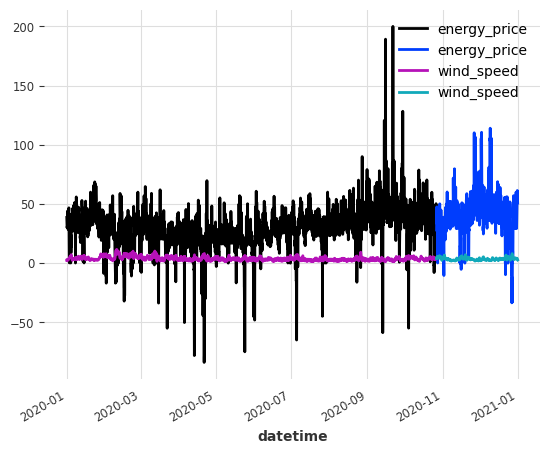

In [8]:
train_price.plot()
val_price.plot()
train_wind.plot()
val_wind.plot()


In [9]:
from darts.dataprocessing.transformers import Scaler

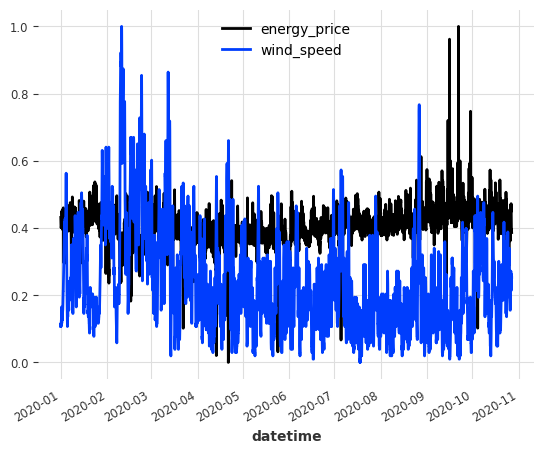

In [10]:
scaler = Scaler()
train_price_scaled, train_wind_scaled = scaler.fit_transform([train_price, train_wind])


train_price_scaled.plot()
train_wind_scaled.plot()

In [11]:
from darts.models import NBEATSModel

In [13]:
model_nbeats = NBEATSModel(input_chunk_length=168, output_chunk_length=24, random_state=42)

model_nbeats.fit([train_price_scaled, train_wind_scaled], epochs=10, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 7.3 M 
---------------------------------------------------
7.3 M     Trainable params
2.3 K     Non-trainable params
7.3 M     Total params
58.647    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

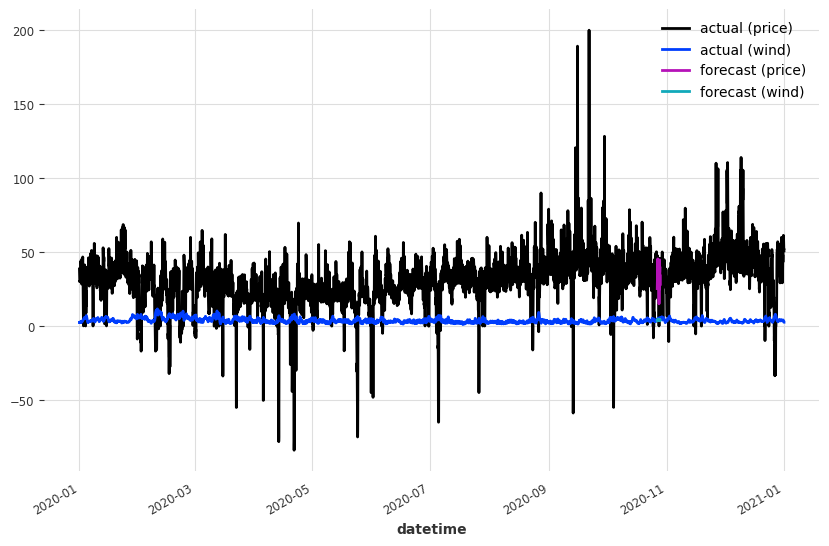

In [14]:
pred_price = model_nbeats.predict(series=train_price_scaled, n=36)
pred_wind = model_nbeats.predict(series=train_wind_scaled, n=36)

# scale back:
pred_price, pred_wind = scaler.inverse_transform([pred_price, pred_wind])

plt.figure(figsize=(10, 6))
series_price.plot(label='actual (price)')
series_wind.plot(label='actual (wind)')
pred_price.plot(label='forecast (price)')
pred_wind.plot(label='forecast (wind)')


In [18]:
mape([series_price, series_wind], [pred_price, pred_wind], inter_reduction=np.mean)

248.17755760678673